<h1>CNN MNIST</h1>
<h6>Saket Tiwari</h6>
Date: 28 Jun 2019

In [44]:
#We will apply convolutional layer in which we will pass many filters
# (10x10) -> 5 filters (3x3) -> output is a (8x8) image channeled with 5 layers ->  5 filters (2x2) -> 
#  -> output is a (7x7) image channeled with 5 layers and each pixel is sum of all the pixels of 5 layers -> flatten the image >
#     apply neural network

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Convolution2D, Dropout, MaxPooling2D
#MaxPooling is used to control the dimension of the image -> puts the maximum value at the output of filter
from keras.models import Sequential

In [46]:
from keras.datasets import mnist
(X_train, y_train),( X_test, y_test)= mnist.load_data()

In [47]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [48]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

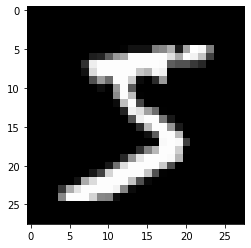

In [49]:
plt.imshow(X_train[0], cmap='gray')

In [50]:
#CNN expect karega ki image multichannel hoga
X_train= X_train.reshape(-1,28,28,1)
X_test= X_test.reshape(-1,28,28,1)
print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [51]:
#one hot encoding
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)

print(y_train.shape,y_test.shape)

(60000, 10) (10000, 10)


In [52]:
X_train= X_train[:3600]
y_train=y_train[:3600]

X_test=X_test[:900]
y_test=y_test[:900]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3600, 28, 28, 1) (3600, 10)
(900, 28, 28, 1) (900, 10)


In [53]:
model=Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(28,28,1)))
model.add(Activation('relu'))

#output dimension of 1st conv-> (26,26,32)
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))

#output dimension of 2nd conv-> (26,26,64)

#since the no of feautre becomes very large in no, therefore we will control dimension using Maxpool
model.add(MaxPooling2D(pool_size=(2,2)))

#output dimension of 2nd conv-> (12,12,64)
model.add(Convolution2D(16, 3, 3))
model.add(Activation('relu'))

#output dimension of 2nd conv-> (10,10,16)

model.add(Flatten())
#1600

#Regularisation using Dropout
model.add(Dropout(0.25))

#output layer
#10->no of classes
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 16)        9232      
_________________________________________________________________
activation_15 (Activation)   (None, 10, 10, 16)        0         
__________

c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  import sys
c:\users\professionally_saket\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  app.launch_new_instance()


In [54]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model.fit( X_train,y_train, batch_size=8, epochs=10,validation_data=(X_test,y_test))

Train on 3600 samples, validate on 900 samples
Epoch 1/10
3600/3600 [==============================] - 14s 4ms/step - loss: 1.6220 - acc: 0.7342 - val_loss: 0.2752 - val_acc: 0.9156
Epoch 2/10
3600/3600 [==============================] - 12s 3ms/step - loss: 0.2605 - acc: 0.9247 - val_loss: 0.1543 - val_acc: 0.9511
Epoch 3/10
3600/3600 [==============================] - 13s 3ms/step - loss: 0.1631 - acc: 0.9483 - val_loss: 0.1680 - val_acc: 0.9489
Epoch 4/10
3600/3600 [==============================] - 12s 3ms/step - loss: 0.1226 - acc: 0.9589 - val_loss: 0.1987 - val_acc: 0.9422
Epoch 5/10
3600/3600 [==============================] - 12s 3ms/step - loss: 0.0903 - acc: 0.9764 - val_loss: 0.1012 - val_acc: 0.9689
Epoch 6/10
3600/3600 [==============================] - 13s 4ms/step - loss: 0.0890 - acc: 0.9711 - val_loss: 0.1299 - val_acc: 0.9622
Epoch 7/10
3600/3600 [==============================] - 12s 3ms/step - loss: 0.0823 - acc: 0.9742 - val_loss: 0.1564 - val_acc: 0.9578
Epoch 8/

In [56]:
model.save()

TypeError: save() missing 1 required positional argument: 'filepath'